# Good tester calls for the Data Fetcher and the Site Finder to make sure they're working right!

## Imports

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
import json

# local imports
from find_sites import findSites
findsites = findSites()

import sys
sys.path.append('/Users/olivia/main/research/atmospheric_chem_ML/chem150')
from data_fetcher import DataFetcher
datafetcher = DataFetcher()

In [2]:
ANNUAL_DATA_BY_SITE = 'annualData/bySite'

## Data Fetcher test calls

### Types of Tests

1. Test with no hourly PM2.5

2. Test with hourly PM2.5 

3. Test with hourly PM2.5 after a certain amount of time

4. Test with no data at all

5. Has both types of wind data

6. Has only scalar types of wind data 

7. Test with only one variable that we know is there

8. Test for only one variable we know isn't there

### Actual Tests

#### 1. LA North Mainstreet

This site has no PM2.5 hourly, so it should pull nothing for PM2.5!

It also should eventually be annually scanned so that it doesn't do unneeded pulls!

In [112]:
AQS_LA_df = datafetcher.create_dataset(20190210, 20190210, site=1103, county='037', state='06', processed=True, verbose=False)
AQS_LA_df

No hourly data for PM2.5 - Local Conditions (annual check)


,Carbon monoxide,Nitrogen dioxide (NO2),Ozone,Wind Direction - Resultant,Wind Speed - Resultant,Outdoor Temperature,Relative Humidity,Solar radiation,Ultraviolet radiation,Barometric pressure,Carbon monoxide - qualifier,Nitrogen dioxide (NO2) - qualifier,Ozone - qualifier,Wind Direction - Resultant - qualifier,Wind Speed - Resultant - qualifier,Outdoor Temperature - qualifier,Relative Humidity - qualifier,Solar radiation - qualifier,Ultraviolet radiation - qualifier,Barometric pressure - qualifier
datetime,,,,,,,,,,,,,,,,,,,,
2019-02-10 00:00:00,0.4785,19.8,0.007,64.0,3.5,50.3,77.0,0.00,0.00,1005.0,None,None,None,None,None,None,None,None,None,None
2019-02-10 01:00:00,0.3890,15.3,0.010,63.0,2.5,49.6,75.0,0.00,0.00,1005.0,None,None,None,None,None,None,None,None,None,None
2019-02-10 02:00:00,0.3105,11.7,0.013,52.0,2.3,49.6,73.0,0.00,0.00,1005.0,None,None,None,None,None,None,None,None,None,None
2019-02-10 03:00:00,0.3875,12.7,0.012,64.0,1.3,48.8,72.0,0.00,0.00,1005.0,None,None,None,None,None,None,None,None,None,None
2019-02-10 04:00:00,0.3970,17.2,0.007,62.0,2.4,48.5,73.0,0.00,0.00,1004.0,None,None,None,None,None,None,None,None,None,None
2019-02-10 05:00:00,0.3100,13.7,0.010,88.0,2.5,48.9,77.0,0.00,0.00,1004.0,None,None,None,None,None,None,None,None,None,None
2019-02-10 06:00:00,0.3715,15.1,0.010,52.0,3.3,48.7,83.0,0.00,0.00,1004.0,None,None,None,None,None,None,None,None,None,None
2019-02-10 07:00:00,0.3055,11.7,0.012,65.0,2.0,49.3,80.0,0.12,0.01,1005.0,None,None,None,None,None,None,None,None,None,None
2019-02-10 08:00:00,0.2760,8.5,0.019,80.0,3.8,51.0,78.0,0.32,0.02,1005.0,None,None,None,None,None,None,None,None,None,None


#### 2. Long Beach South

This site doesn't have ozone but does have hourly PM2.5 !! This is a good other check to see if regular PM2.5 still works ok.

In [30]:
long_beach_df = datafetcher.create_dataset(20170210, 20170415, site='4004', county='037', state='06', processed=True, verbose=False)
long_beach_df

No data for Carbon monoxide
No data for Nitrogen dioxide (NO2)
No data for Ozone
There is hourly data for PM2.5 - Local Conditions starting in the year 2017
No data for Solar radiation
No data for Ultraviolet radiation


,PM2.5 - Local Conditions,Wind Direction - Resultant,Wind Speed - Resultant,Outdoor Temperature,Relative Humidity,Barometric pressure,PM2.5 - Local Conditions - qualifier,Wind Direction - Resultant - qualifier,Wind Speed - Resultant - qualifier,Outdoor Temperature - qualifier,Relative Humidity - qualifier,Barometric pressure - qualifier
datetime,,,,,,,,,,,,
2017-01-01 00:00:00,55.4,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None
2017-01-01 01:00:00,41.9,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None
2017-01-01 02:00:00,53.5,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None
2017-01-01 03:00:00,50.8,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None
2017-01-01 04:00:00,53.0,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-15 19:00:00,11.3,314.0,2.4,61.2,42.0,1011.0,None,None,None,None,None,None
2017-04-15 20:00:00,11.5,328.0,3.2,59.1,52.0,1011.0,None,None,None,None,None,None
2017-04-15 21:00:00,13.3,321.0,2.5,56.8,69.0,1011.0,None,None,None,None,None,None


In [10]:
# now this is a test for if PM2.5 started theoretically in 2018 instead 
long_beach_df = datafetcher.create_dataset(20170210, 20180415, site='4004', county='037', state='06', processed=True, verbose=False)
long_beach_df

No data for Carbon monoxide
No data for Nitrogen dioxide (NO2)
No data for Ozone
No data for Solar radiation
No data for Ultraviolet radiation


,PM2.5 - Local Conditions,Wind Direction - Resultant,Wind Speed - Resultant,Outdoor Temperature,Relative Humidity,Barometric pressure,PM2.5 - Local Conditions - qualifier,Wind Direction - Resultant - qualifier,Wind Speed - Resultant - qualifier,Outdoor Temperature - qualifier,Relative Humidity - qualifier,Barometric pressure - qualifier
datetime,,,,,,,,,,,,
2017-02-10 00:00:00,NaN,300.0,3.3,54.5,80.0,1013.0,None,None,None,None,None,None
2017-02-10 01:00:00,NaN,59.0,1.3,53.1,84.0,1012.0,None,None,None,None,None,None
2017-02-10 02:00:00,NaN,85.0,1.1,52.3,86.0,1012.0,None,None,None,None,None,None
2017-02-10 03:00:00,NaN,5.0,0.7,52.2,87.0,1012.0,None,None,None,None,None,None
2017-02-10 04:00:00,NaN,83.0,2.1,51.4,88.0,1011.0,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-15 19:00:00,20.7,321.0,4.9,57.1,65.0,1010.0,None,None,None,None,None,None
2018-04-15 20:00:00,14.4,307.0,5.3,56.0,67.0,1010.0,None,None,None,None,None,None
2018-04-15 21:00:00,13.4,330.0,5.4,55.3,67.0,1010.0,None,None,None,None,None,None


<AxesSubplot:xlabel='datetime'>

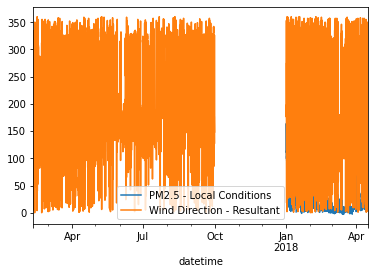

In [11]:
long_beach_df[['PM2.5 - Local Conditions', 'Wind Direction - Resultant']].plot.line()

#### Long pull until Long Beach has PM2.5

Another good test is testing the range where Long Beach starts having hourly PM2.5. First we need to find that time.

We'll do a monitors per state pull to see when the earliest Long Beach PM2.5 data is and then start there!

Then to ensure this is correct, we're going to graph with and without PM2.5 because that allows us to really see all the data!

### Smaller Function Tests

#### 1. Has Sample Duration for several years

#### 2. annual_df: Missing Sample Duration

We're going to check where there's no data. To show that there's no data:

In [26]:
annual_df = datafetcher.get_data(ANNUAL_DATA_BY_SITE, 88101, 20150101, 20150618, df = True, nparams={'state':'06', 'county':'037', 'site':'4004'})
annual_df = annual_df[annual_df['sample_duration'] == '1 HOUR']
annual_df

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration_code,...,fiftieth_percentile,tenth_percentile,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change


In [28]:
df = datafetcher.annual_checker(88101, 20000618, 20200618, '4004', '037', '06')
df

ystart: 20000618 and yend: 20001231
ystart: 20020101 and yend: 20021231
ystart: 20040101 and yend: 20041231
ystart: 20060101 and yend: 20061231
ystart: 20080101 and yend: 20081231
ystart: 20100101 and yend: 20101231
ystart: 20120101 and yend: 20121231
ystart: 20140101 and yend: 20141231
ystart: 20160101 and yend: 20161231


2016

## Finding Sites test calls

### Actual Tests

#### 1. Regular california call when we know there is data in the state
This works! Yay!

In [77]:
df = findsites.best_sites_state('06',1980)
df

No data for Solar radiation in this range for state 06
No data for Barometric pressure in this range for state 06
No data for Ultraviolet radiation in this range for state 06
No data for PM2.5 - Local Conditions in this range for state 06


,site_code,local_site_name,county_code,Ozone,Wind Speed - Resultant,Carbon monoxide,Relative Humidity,Outdoor Temperature,Wind Direction - Resultant,Nitrogen dioxide (NO2),total_params
0,0001,Barstow,071,1,1,1,0,0,1,1,5
1,1006,Alpine,073,1,1,0,1,1,1,0,5
2,0004,Vallejo,095,1,0,1,0,0,0,1,3
3,1001,Los Gatos,085,1,0,1,0,0,0,1,3
4,1004,Upland,071,1,0,1,0,0,0,1,3
5,1103,Los Angeles-North Main Street,037,1,0,1,0,0,0,1,3
6,3001,El Rio-Rio Mesa School #2,111,1,1,0,0,0,1,0,3
7,5001,La Habra,059,1,0,1,0,0,0,1,3
8,8001,Rubidoux,065,1,0,1,0,0,0,1,3
9,0002,Azusa,037,1,0,1,0,0,0,0,2


#### 2. California call where there are no sites

In [72]:
df = findsites.best_sites_state('06',1960)
df

No matching sites found for state 06


,site_number,local_site_name,county_code,Ozone


#### 3. Call to different state (03) where we give Ozone as a parameter

In [114]:
df = findsites.best_sites_state('02',2015, mandatory_params=['Ozone', 'PM2.5 - Local Conditions'])
df

No hourly data found for state 02 for mandatory parameter PM2.5 - Local Conditions


,local_site_name,county_code,Ozone,Wind Speed - Resultant,Carbon monoxide,Solar radiation,Barometric pressure,Relative Humidity,Wind Speed - Scalar,Outdoor Temperature,Wind Direction - Resultant,PM2.5 - Local Conditions
site_number,,,,,,,,,,,,


#### 4. Call to a non-exist state (this was on accident lmao)

In [23]:
df = findsites.best_sites_state('03',2001, mandatory_params=['Ozone', 'PM2.5 - Local Conditions'])


No matching sites found for state 03


#### 5. Call to state where we don't give Ozone as a parameter

In [115]:
df = findsites.best_sites_state('06',2010, mandatory_params=['PM2.5 - Local Conditions'])
df

Hey we did it
Hey we did it


,site_code,local_site_name,county_code,total_params,Ozone,Carbon monoxide,Solar radiation,Barometric pressure,Relative Humidity,Ultraviolet radiation,Outdoor Temperature,PM2.5 - Local Conditions,Nitrogen dioxide (NO2),Wind Speed,Wind Direction
0,5001,Clovis-Villa,019,10,1,1,1,1,1,0,1,1,1,1,1
1,2009,Tranquillity,019,6,1,0,0,1,0,0,1,1,0,1,1


#### 6. Call where there is hourly PM2.5 data in the state

In [25]:
df = findsites.best_sites_state('06',2017, mandatory_params=['PM2.5 - Local Conditions'])
df

,local_site_name,county_code,Ozone,Wind Speed - Resultant,Carbon monoxide,Solar radiation,Barometric pressure,Relative Humidity,Ultraviolet radiation,Outdoor Temperature,Wind Direction - Resultant,PM2.5 - Local Conditions,Nitrogen dioxide (NO2),total_params
site_number,,,,,,,,,,,,,,
8001,Rubidoux,065,1,1,1,1,1,1,1,1,1,1,1,11
0008,King City 2,053,1,1,1,1,1,1,1,1,1,1,1,11
0011,Fresno - Garland,019,1,1,1,1,1,1,1,1,1,1,1,11
0002,White Mountain Research Center - Owens Valley Lab,027,1,1,1,1,1,1,0,1,1,1,1,10
1004,Ojai - East Ojai Ave,111,1,1,1,1,1,1,0,1,1,1,1,10
5001,Clovis-Villa,019,1,1,1,1,1,1,0,1,1,1,1,10
2002,Simi Valley-Cochran Street,111,1,1,1,1,1,1,0,1,1,1,1,10
0007,Livermore,001,1,1,1,1,1,1,0,1,1,1,1,10
0012,Folsom-Natoma St.,067,1,1,1,0,1,1,0,1,1,1,1,9


Now let's check if this actually has annual!

In [17]:
clovisvilla_df = datafetcher.create_dataset(20100210, 20100215, site='5001', county='019', state='06', processed=True, verbose=False)
clovisvilla_df


ystart: 20100210 and yend: 20100215
There is hourly data for PM2.5 - Local Conditions after the year 2010
No data for Ultraviolet radiation


,Carbon monoxide,Nitrogen dioxide (NO2),Ozone,PM2.5 - Local Conditions,Wind Direction - Resultant,Wind Speed - Resultant,Outdoor Temperature,Relative Humidity,Solar radiation,Barometric pressure,Carbon monoxide - qualifier,Nitrogen dioxide (NO2) - qualifier,Ozone - qualifier,PM2.5 - Local Conditions - qualifier,Wind Direction - Resultant - qualifier,Wind Speed - Resultant - qualifier,Outdoor Temperature - qualifier,Relative Humidity - qualifier,Solar radiation - qualifier,Barometric pressure - qualifier
datetime,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,NaN,NaN,NaN,69.0,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None
2010-01-01 01:00:00,NaN,NaN,NaN,54.0,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None
2010-01-01 02:00:00,NaN,NaN,NaN,48.0,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None
2010-01-01 03:00:00,NaN,NaN,NaN,41.0,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None
2010-01-01 04:00:00,NaN,NaN,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-02-15 19:00:00,0.4,23.0,0.008,17.0,311.0,1.7,57.0,80.0,0.0,1005.2,None,None,None,None,None,None,None,None,None,None
2010-02-15 20:00:00,0.4,23.0,0.005,24.0,349.0,1.7,55.0,86.0,0.0,1005.2,None,None,None,None,None,None,None,None,None,None
2010-02-15 21:00:00,0.7,25.0,0.001,28.0,53.0,1.7,54.0,94.0,0.0,1005.2,None,None,None,None,None,None,None,None,None,None


#### 7. Call where we give an end year

In [ ]:
df = findsites.best_sites_state('06',2010, mandatory_params=['Ozone', 'PM2.5 - Local Conditions'])
df

#### 8. Call where there are no other params

In [26]:
df = findsites.best_sites_state('06',2010, mandatory_params=['Ozone', 'PM2.5 - Local Conditions'], other_params=[])
df

,local_site_name,county_code,Ozone,PM2.5 - Local Conditions,total_params
site_number,,,,,
2009,Tranquillity,019,1,1,2
5001,Clovis-Villa,019,1,1,2


#### 9. Call to another state (Arizona)

In [ ]:
df = findsites.best_sites_state('04', 2010, verbose=True)
df

### Tests for best sites in country

#### 1. Test of getting state codes

In [94]:
states = findsites.get_state_codes()
states

<Response [200]>


,state_code,state_name
0,01,Alabama
1,02,Alaska
2,04,Arizona
3,05,Arkansas
4,06,California
5,08,Colorado
6,09,Connecticut
7,10,Delaware
8,11,District Of Columbia
9,12,Florida


In [49]:
my_df = findsites.best_sites_state('06',2010, mandatory_params=['PM2.5 - Local Conditions'])
my_df

,site_number,local_site_name,county_code,Ozone,Wind Speed - Resultant,Carbon monoxide,Solar radiation,Barometric pressure,Relative Humidity,Ultraviolet radiation,Outdoor Temperature,Wind Direction - Resultant,PM2.5 - Local Conditions,Nitrogen dioxide (NO2),total_params
0,5001,Clovis-Villa,019,1,1,1,1,1,1,0,1,1,1,1,10
1,0001,San Andreas-Gold Strike Road,009,1,1,1,0,1,1,0,1,1,1,1,9
2,0009,Oakland,001,1,1,1,1,0,1,0,1,1,1,1,9
3,1003,Salinas 3,053,1,1,1,0,0,0,0,1,1,1,1,7
4,2009,Tranquillity,019,1,1,0,0,1,0,0,1,1,1,0,6


In [55]:
# now let's try to add state_number
code = states.iloc[0]['state_code']
# now fill the column
my_df.insert(0, 'state_code2', code)
my_df

,state_code2,site_number,local_site_name,county_code,Ozone,Wind Speed - Resultant,Carbon monoxide,Solar radiation,Barometric pressure,Relative Humidity,Ultraviolet radiation,Outdoor Temperature,Wind Direction - Resultant,PM2.5 - Local Conditions,Nitrogen dioxide (NO2),total_params,state_code
0,01,5001,Clovis-Villa,019,1,1,1,1,1,1,0,1,1,1,1,10,01
1,01,0001,San Andreas-Gold Strike Road,009,1,1,1,0,1,1,0,1,1,1,1,9,01
2,01,0009,Oakland,001,1,1,1,1,0,1,0,1,1,1,1,9,01
3,01,1003,Salinas 3,053,1,1,1,0,0,0,0,1,1,1,1,7,01
4,01,2009,Tranquillity,019,1,1,0,0,1,0,0,1,1,1,0,6,01


In [53]:
my_df

,site_number,local_site_name,county_code,Ozone,Wind Speed - Resultant,Carbon monoxide,Solar radiation,Barometric pressure,Relative Humidity,Ultraviolet radiation,Outdoor Temperature,Wind Direction - Resultant,PM2.5 - Local Conditions,Nitrogen dioxide (NO2),total_params,state_code
0,5001,Clovis-Villa,019,1,1,1,1,1,1,0,1,1,1,1,10,01
1,0001,San Andreas-Gold Strike Road,009,1,1,1,0,1,1,0,1,1,1,1,9,01
2,0009,Oakland,001,1,1,1,1,0,1,0,1,1,1,1,9,01
3,1003,Salinas 3,053,1,1,1,0,0,0,0,1,1,1,1,7,01
4,2009,Tranquillity,019,1,1,0,0,1,0,0,1,1,1,0,6,01


#### Test: Checking that wind speed scalar and everything combine correctly

#### Full test for the country for 1980

First we're doing the pull where I restricted the state dataframe to [0 ... 4] inside the function

In [123]:
df_country = findsites.best_sites_country(1980)
df_country

<Response [200]>
Finished state Alabama
No matching sites found for state 02
Finished state Alaska
Finished state Arizona
Finished state Arkansas
Finished state California
Finished state Colorado
Finished state Connecticut
No matching sites found for state 10
Finished state Delaware
No matching sites found for state 11
Finished state District Of Columbia
Finished state Florida
Finished state Georgia
No matching sites found for state 15
Finished state Hawaii
No matching sites found for state 16
Finished state Idaho
Finished state Illinois
Finished state Indiana
No matching sites found for state 19
Finished state Iowa
Finished state Kansas
Finished state Kentucky
Finished state Louisiana
No matching sites found for state 23
Finished state Maine
Finished state Maryland
Finished state Massachusetts
Finished state Michigan
Finished state Minnesota
Finished state Mississippi
Finished state Missouri
No matching sites found for state 30
Finished state Montana
No hourly data found for state 31 

,state_code,state_name,site_number,local_site_name,county_code,total_params,Ozone,Carbon monoxide,Nitrogen dioxide (NO2),Wind Speed,Wind Direction,Relative Humidity,Outdoor Temperature,Barometric pressure
0,01,Alabama,1003,Fairfield,073,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,01,Alabama,0014,HUNTSVILLE OLD AIRPORT,089,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,04,Arizona,3002,CENTRAL PHOENIX,013,5.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,04,Arizona,1004,NORTH PHOENIX,013,3.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,04,Arizona,2001,GLENDALE,013,3.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,48,Texas,0024,Houston Aldine,201,5.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
1,48,Texas,1002,Fort Worth Northwest,439,5.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
2,48,Texas,0014,Austin North Hills Drive,453,4.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
0,51,Virginia,0020,Aurora Hills Visitors Center,013,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [124]:
df_country.to_csv('full_country_1980_ozone_wind.csv')

Now to see if this is accurate, let's just test Alabama

In [91]:
df = findsites.best_sites_state('01', 2010)
df

,site_code,local_site_name,county_code,total_params,Ozone,Carbon monoxide,PM2.5 - Local Conditions
0,1003,Fairfield,073,3,1,1,1
1,0003,CHICKASAW,097,2,1,0,1
2,0004,HELENA,117,2,1,0,1
3,0010,"FAIRHOPE, Alabama",003,2,1,0,1
4,0011,SOUTHSIDE,055,2,1,0,1
5,0014,HUNTSVILLE OLD AIRPORT,089,2,1,0,1
6,0023,North Birmingham,073,2,1,0,1
7,1002,"MOMS, ADEM",101,2,1,0,1
8,1005,McAdory,073,2,1,0,1
9,1010,Leeds,073,1,1,0,0


In [ ]:
df = findsites.best_sites_state('04', 2010)
df

In [109]:
df = findsites.best_sites_state('06', 1980)
df

Hey we did it
Hey we did it


,site_code,local_site_name,county_code,total_params,Ozone,Carbon monoxide,Relative Humidity,Outdoor Temperature,Wind Direction,Nitrogen dioxide (NO2),Wind Speed
0,0001,Barstow,071,5,1,1,0,0,1,1,1
1,1006,Alpine,073,5,1,0,1,1,1,0,1
2,0004,Vallejo,095,3,1,1,0,0,0,1,0
3,1001,Los Gatos,085,3,1,1,0,0,0,1,0
4,1004,Upland,071,3,1,1,0,0,0,1,0
5,1103,Los Angeles-North Main Street,037,3,1,1,0,0,0,1,0
6,3001,El Rio-Rio Mesa School #2,111,3,1,0,0,0,1,0,1
7,5001,La Habra,059,3,1,1,0,0,0,1,0
8,8001,Rubidoux,065,3,1,1,0,0,0,1,0
9,0002,Azusa,037,2,1,1,0,0,0,0,0


In [110]:
df.to_csv('full_country_1980_ozone_wind.csv')

#### Testing the Wind!!

OK so first, I'm putting just Scalar in what we want

I know Rhode island has a site that only has one type of wind!

In [120]:
df = findsites.best_sites_state('44', 1980, other_params=['Wind Speed - Scalar', 'Wind Direction - Scalar'])
df

,site_code,local_site_name,county_code,total_params,Ozone,Wind Speed,Wind Direction
0,0002,AJ,003,3,1,1,1


In [121]:
df = findsites.best_sites_state('44', 1980, other_params=['Wind Speed - Resultant', 'Wind Direction - Resultant'])
df

,site_code,local_site_name,county_code,total_params,Ozone
0,0002,AJ,003,1,1


Ok so this successfully only has Scalar wowza

In [122]:
df = findsites.best_sites_state('44', 2010, other_params=['Wind Speed - Scalar', 'Wind Direction - Scalar', 'Wind Speed - Resultant', 'Wind Direction - Resultant'])
df

,site_code,local_site_name,county_code,total_params,Ozone,Wind Direction,Wind Speed
0,0002,AJ,003,3,1,1,1
1,0007,US-EPA Laboratory,009,1,1,0,0
2,1010,FRANCIS SCHOOL East Providence,007,1,1,0,0


### Now doing actual calls to store in spreadsheets since (I think?) the site finder works now

#### Weird failure

In [125]:
df_country_pm25 = findsites.best_sites_country(2010, mandatory_params=['Ozone', 'PM2.5 - Local Conditions'])
df_country_pm25

<Response [200]>
Finished state Alabama
No hourly data found for state 02 for mandatory parameter Ozone
Finished state Alaska
Finished state Arizona
No hourly data found for state 05 for mandatory parameter PM2.5 - Local Conditions
Finished state Arkansas
Finished state California
No hourly data found for state 08 for mandatory parameter PM2.5 - Local Conditions
Finished state Colorado
No hourly data found for state 09 for mandatory parameter PM2.5 - Local Conditions
Finished state Connecticut
No hourly data found for state 10 for mandatory parameter PM2.5 - Local Conditions
Finished state Delaware
No hourly data found for state 11 for mandatory parameter PM2.5 - Local Conditions
Finished state District Of Columbia
No hourly data found for state 12 for mandatory parameter PM2.5 - Local Conditions
Finished state Florida
No hourly data found for state 13 for mandatory parameter PM2.5 - Local Conditions
Finished state Georgia
Finished state Hawaii
Finished state Idaho
No hourly data found

ConnectionError: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))

#### Call with Pm2.5 2010

In [126]:
df_country_pm25 = findsites.best_sites_country(2010, mandatory_params=['Ozone', 'PM2.5 - Local Conditions'])
df_country_pm25

<Response [200]>
Finished state Alabama
No hourly data found for state 02 for mandatory parameter Ozone
Finished state Alaska
Finished state Arizona
No hourly data found for state 05 for mandatory parameter PM2.5 - Local Conditions
Finished state Arkansas
Finished state California
No hourly data found for state 08 for mandatory parameter PM2.5 - Local Conditions
Finished state Colorado
No hourly data found for state 09 for mandatory parameter PM2.5 - Local Conditions
Finished state Connecticut
No hourly data found for state 10 for mandatory parameter PM2.5 - Local Conditions
Finished state Delaware
No hourly data found for state 11 for mandatory parameter PM2.5 - Local Conditions
Finished state District Of Columbia
No hourly data found for state 12 for mandatory parameter PM2.5 - Local Conditions
Finished state Florida
No hourly data found for state 13 for mandatory parameter PM2.5 - Local Conditions
Finished state Georgia
Finished state Hawaii
Finished state Idaho
No hourly data found

,state_code,state_name,site_number,local_site_name,county_code,total_params,Ozone,Carbon monoxide,PM2.5 - Local Conditions,Wind Speed - Resultant,...,Relative Humidity,Wind Speed - Scalar,Outdoor Temperature,Wind Direction - Resultant,Nitrogen dioxide (NO2),Wind Speed,Wind Direction,Barometric pressure,Ultraviolet radiation,Wind Direction - Scalar
0,01,Alabama,1002,"MOMS, ADEM",101,2.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,04,Arizona,0019,WEST PHOENIX,013,6.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
0,06,California,5001,Clovis-Villa,019,10.0,1.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
1,06,California,2009,Tranquillity,019,6.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
0,15,Hawaii,1004,Sand Island,003,2.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,16,Idaho,0010,Meridian - St. Luke's,001,4.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
0,18,Indiana,0022,Gary-IITRI/ 1219.5 meters east of Tennessee St...,089,10.0,1.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
1,18,Indiana,0078,Indpls- Washington Park/ in parking lot next ...,097,7.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,18,Indiana,0015,South Bend-Shields Dr.,141,6.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,18,Indiana,0018,TERRE HAUTE CAAP/ McLean High School,167,2.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
df_country_pm25.to_csv('1980_pm25_ozone_sites.csv')

In [130]:
df_country_1970 = findsites.best_sites_country(1970, mandatory_params=['Ozone'])
df_country_1970

<Response [200]>
No matching sites found for state 01
Finished state Alabama
No matching sites found for state 02
Finished state Alaska
No hourly data found for state 04 for mandatory parameter Ozone
Finished state Arizona
No matching sites found for state 05
Finished state Arkansas
No matching sites found for state 06
Finished state California
No matching sites found for state 08
Finished state Colorado
No matching sites found for state 09
Finished state Connecticut
No matching sites found for state 10
Finished state Delaware
No matching sites found for state 11
Finished state District Of Columbia
No matching sites found for state 12
Finished state Florida
No matching sites found for state 13
Finished state Georgia
No matching sites found for state 15
Finished state Hawaii
No matching sites found for state 16
Finished state Idaho
No matching sites found for state 17
Finished state Illinois
No matching sites found for state 18
Finished state Indiana
No matching sites found for state 19

,state_code,state_name,site_number,local_site_name,county_code,Ozone,Carbon monoxide,Nitrogen dioxide (NO2)


In [ ]:
df_2005 = findsites.best_sites_country(2005, mandatory_params=['Ozone'])
df_2005